In [2]:
%matplotlib inline
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
from scipy.stats import chisquare, ks_2samp

In [3]:
df = pd.read_csv("D:\Downloads\Train-1617360447408-1660719685476.csv")

In [4]:
df.shape

(66587, 49)

In [5]:
df.dtypes

index                   int64
encounter_id            int64
patient_id              int64
race                   object
gender                 object
age                    object
weight                 object
time_in_hospital        int64
medical_specialty      object
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
diag_1                 object
diag_2                 object
diag_3                 object
diag_4                 object
diag_5                float64
number_diagnoses        int64
X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X8                     object
X9                     object
X10                    object
X11                    object
X12                    object
X13       

In [6]:
df.head

<bound method NDFrame.head of        index  encounter_id  patient_id             race  gender      age  \
0      69375     197029140    51521940         Hispanic    Male  [80-90)   
1      57272     163571946    92631357        Caucasian    Male  [60-70)   
2      82347     256497366    30023982        Caucasian  Female  [50-60)   
3      89608     289891212    93606021  AfricanAmerican  Female  [70-80)   
4      24091      81873900    23464296        Caucasian    Male  [70-80)   
...      ...           ...         ...              ...     ...      ...   
66582  39934     124202466    23450508        Caucasian  Female  [70-80)   
66583  47366     145667070    29324601        Caucasian    Male  [80-90)   
66584  76555     231061116     2179062        Caucasian  Female  [60-70)   
66585  25392      84911682    20531754                ?  Female  [80-90)   
66586  51312     153167502    81985473        Caucasian  Female  [80-90)   

      weight  time_in_hospital medical_specialty  num_lab

In [7]:
df.shape

(66587, 49)

In [8]:
#Printing all the columns in the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              66587 non-null  object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   66587 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66587 non-null  object 
 16  diag

In [9]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 1504
gender 0
age 0
weight 64454
medical_specialty 32672
diag_1 15
diag_2 231
diag_3 954
diag_4 954
X1 0
X2 0
X3 0
X4 0
X5 0
X6 0
X7 0
X8 0
X9 0
X10 0
X11 0
X12 0
X13 0
X14 0
X15 0
X16 0
X17 0
X18 0
X19 0
X20 0
X21 0
X22 0
X23 0
X24 0
X25 0
change 0
diabetesMed 0


In [10]:
#finding the number of null values in each column
print(df.isnull().sum())

index                 0
encounter_id          0
patient_id            0
race                  0
gender                0
age                   0
weight                0
time_in_hospital      0
medical_specialty     0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      0
X1                    0
X2                    0
X3                    0
X4                    0
X5                    0
X6                    0
X7                    0
X8                    0
X9                    0
X10                   0
X11                   0
X12                   0
X13                   0
X14                   0
X15                   0
X16                   0
X17                   0
X18                   0
X19                   0
X20                   0
X21             

In [11]:
df.shape

(66587, 49)

In [12]:
df.drop(['weight','race','medical_specialty','diag_3','diag_4'],axis=1,inplace=True)
df.shape

(66587, 44)

In [13]:
#Dropping rows with missing values
df.dropna(inplace=True)
df.shape

(66587, 44)

In [14]:
df[0:3]

,index,encounter_id,patient_id,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Male,[80-90),4,39,1,9,1,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Male,[60-70),3,34,1,12,0,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Female,[50-60),6,50,2,24,0,...,No,Down,No,No,No,No,No,Ch,Yes,1


In [15]:
#creating a list of categorical and numeric columns names
categorical=df.select_dtypes(include=['object'])
numeric=df.select_dtypes(exclude=['object'])
print(categorical.columns.values)
print(numeric.columns.values)

['gender' 'age' 'diag_1' 'diag_2' 'X1' 'X2' 'X3' 'X4' 'X5' 'X6' 'X7' 'X8'
 'X9' 'X10' 'X11' 'X12' 'X13' 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20'
 'X21' 'X22' 'X23' 'X24' 'X25' 'change' 'diabetesMed']
['index' 'encounter_id' 'patient_id' 'time_in_hospital'
 'num_lab_procedures' 'num_procedures' 'num_medications'
 'number_outpatient' 'number_emergency' 'number_inpatient' 'diag_5'
 'number_diagnoses' 'readmitted']


In [16]:
#printing the frequency count of all the categorical features
for col in categorical:
    print(categorical[col].value_counts())

Female             35973
Male               30612
Unknown/Invalid        2
Name: gender, dtype: int64
[70-80)     17031
[60-70)     14845
[50-60)     11378
[80-90)     11080
[40-50)      6324
[30-40)      2414
[90-100)     1833
[20-30)      1154
[10-20)       428
[0-10)        100
Name: age, dtype: int64
428    4564
414    4183
786    2659
410    2382
486    2233
       ... 
377       1
422       1
336       1
143       1
862       1
Name: diag_1, Length: 652, dtype: int64
276    4420
428    4372
250    4100
427    3260
401    2371
       ... 
942       1
35        1
658       1
702       1
78        1
Name: diag_2, Length: 656, dtype: int64
None    63104
Norm     1643
>200      991
>300      849
Name: X1, dtype: int64
None    55451
>8       5342
Norm     3246
>7       2548
Name: X2, dtype: int64
No        53528
Steady    11921
Up          718
Down        420
Name: X3, dtype: int64
No        65548
Steady      949
Up           60
Down         30
Name: X4, dtype: int64
No        66111
St

In [17]:
#printing the frequency of all the numeric features
for col in numeric:
    print(numeric[col].value_counts())
# Didn't find any outliers

15569    6
26267    6
23454    6
54943    6
36762    6
        ..
96099    1
86642    1
20366    1
67097    1
51312    1
Name: index, Length: 48911, dtype: int64
59639418     6
86736966     6
80089374     6
159270720    6
113164098    6
            ..
370803728    1
275681568    1
71802714     1
188025426    1
153167502    1
Name: encounter_id, Length: 48911, dtype: int64
88785891    27
88789707    21
91776843    21
40373325    20
86931513    19
            ..
91410732     1
48264381     1
10527606     1
84988611     1
81985473     1
Name: patient_id, Length: 39650, dtype: int64
3     11684
2     11370
1      9132
4      9105
5      6554
6      5027
7      3758
8      2825
9      1899
10     1552
11     1237
12     1006
13      787
14      651
Name: time_in_hospital, dtype: int64
1      2005
43     1861
45     1597
44     1592
46     1446
       ... 
129       1
113       1
120       1
118       1
104       1
Name: num_lab_procedures, Length: 113, dtype: int64
0    30678
1    13671
2  

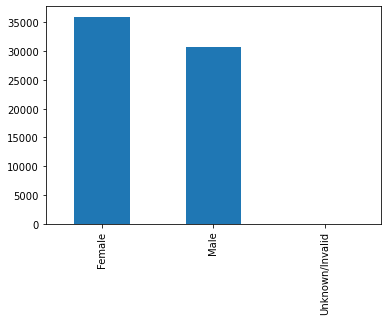

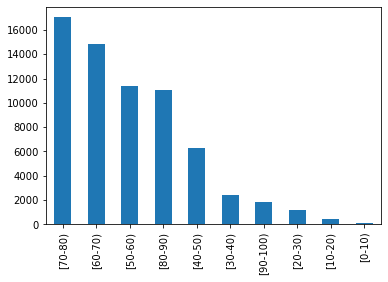

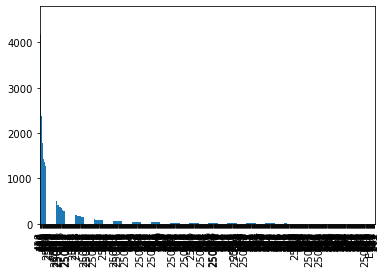

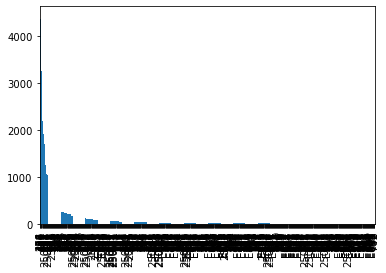

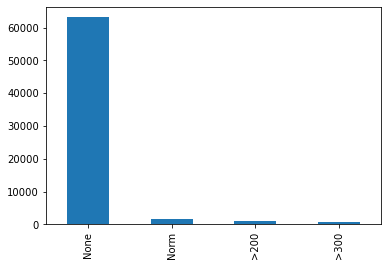

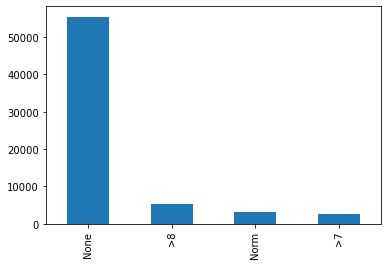

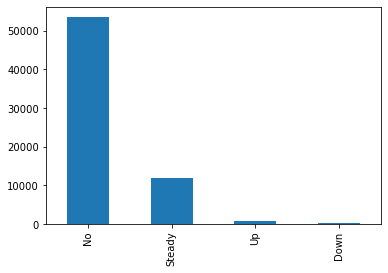

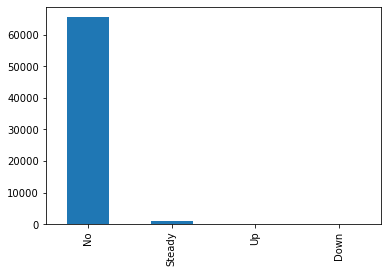

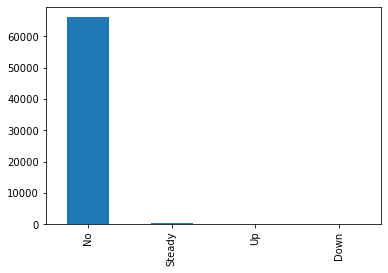

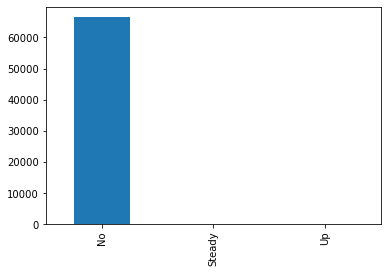

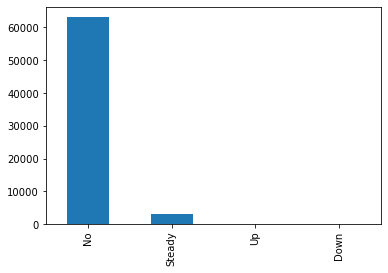

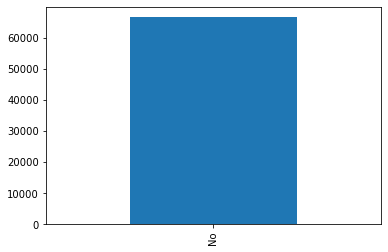

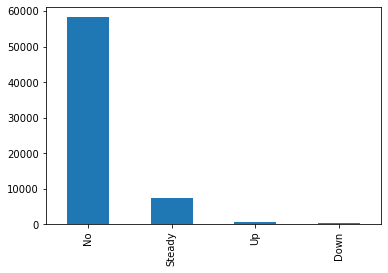

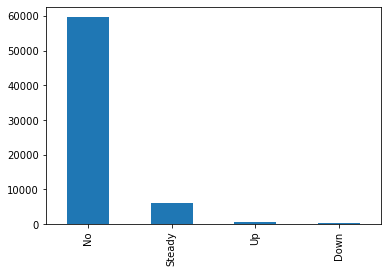

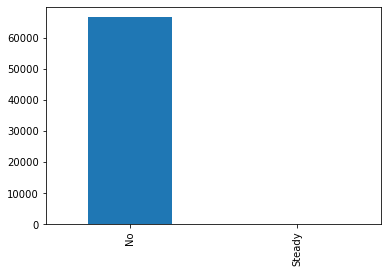

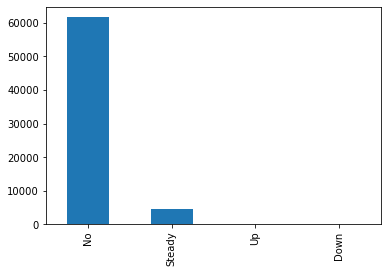

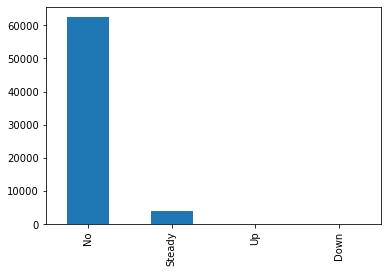

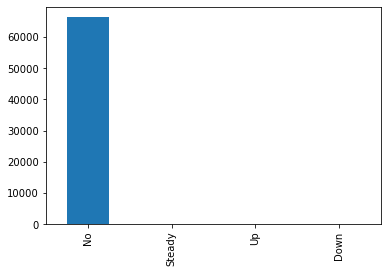

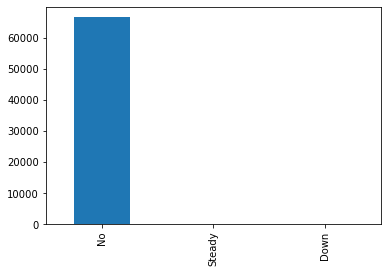

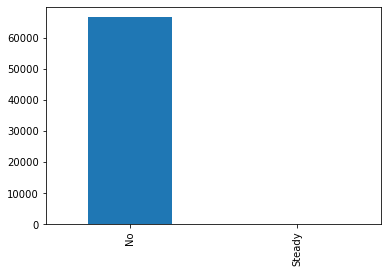

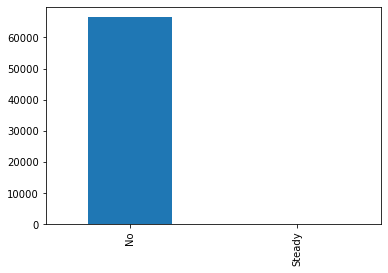

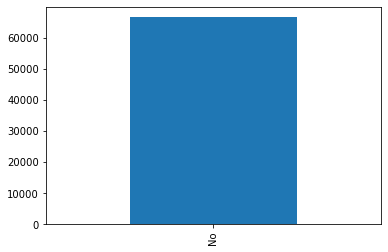

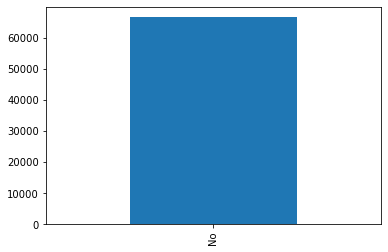

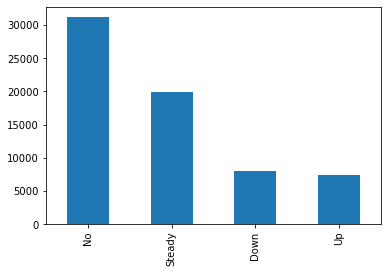

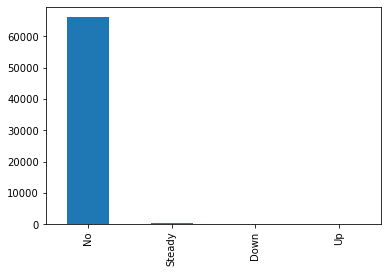

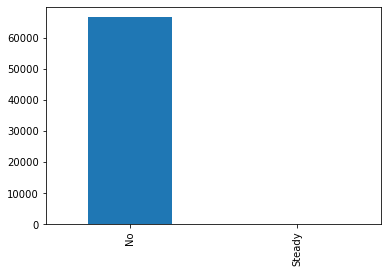

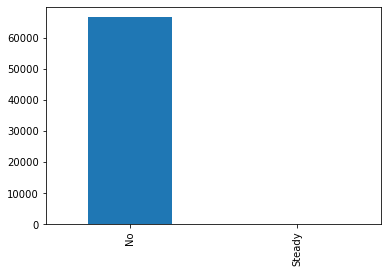

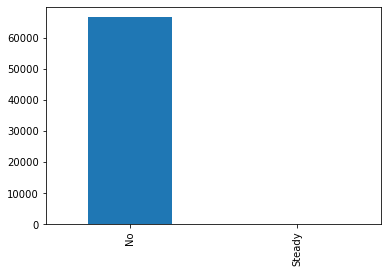

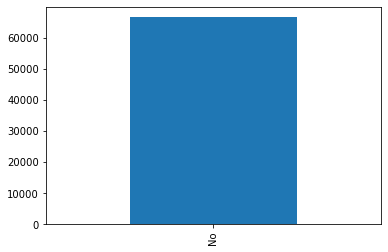

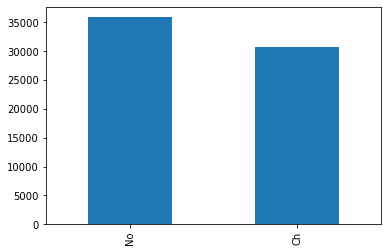

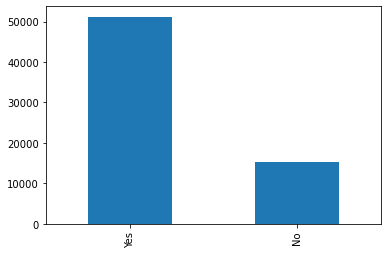

In [18]:
for col in categorical:
    categorical[col].value_counts().plot(kind='bar')
    plt.show()

<AxesSubplot:title={'center':'Readmission_count'}>

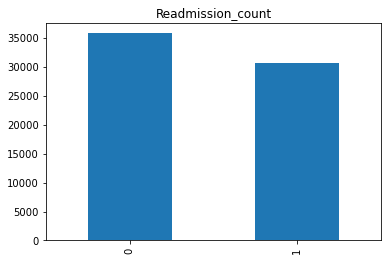

In [19]:
# Attribute Plotting

#Readmission Rate Count
target_count=df['readmitted'].value_counts()
target_count.plot(kind='bar', title='Readmission_count')



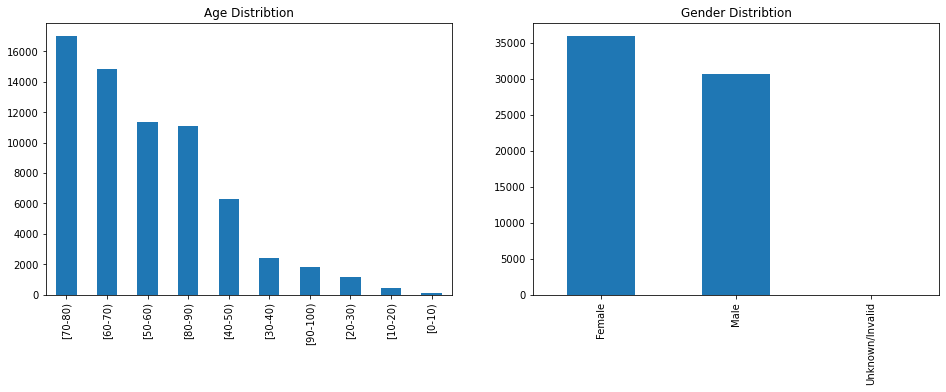

In [20]:
# Age and Gender Count

age_count=df["age"].value_counts()
gender_count=df["gender"].value_counts()   # Have to deal with unkown/invalid count 
fig,(ax1, ax2)= plt.subplots(1,2,figsize=(16,5))
_ = age_count.plot(kind='bar',title='Age Distribtion',ax=ax1)
_ = gender_count.plot(kind='bar',title='Gender Distribtion',ax=ax2)


### FEATURE ENGINEERING


In [21]:
# There are 3 types of visits to a hospital. 1) Inpatient 2) Outpatient 3) Emergency.
# Combining them into a single column
# Create new feature: total_visit

df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [22]:
#defining a function to give average value for the age
def agecategory(x):
    
    if x == "[0-10)" :
        return 5
    elif x == "[10-20)":
        return 15
    elif x == "[20-30)":
        return 25
    elif x == "[30-40)":
        return 35
    elif x == "[40-50)":
        return 45
    elif x == "[50-60)":
        return 55
    elif x == "[60-70)":
        return 65
    elif x == "[70-80)":
        return 75
    else:
        return 0

In [23]:
#replacing the age bins with their average value
df['age'] = df['age'].apply(lambda x: agecategory(x))

In [24]:
df['age'][:10]

0     0
1    65
2    55
3    75
4    75
5    45
6    75
7    45
8    75
9    75
Name: age, dtype: int64

In [25]:
#It seems like there are many treatments from which a doctor would recommend the patient, lets combine all the\
#treatments into one dataframe

treatments = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7','X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14','X15', 'X16', 'X17', 'X18', 'X19', 'X20','X21','X22','X23','X24','X25']



In [26]:
print(treatments)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25']


In [27]:
#assigning a value of 0 if there are not undergoing treatment and assigning 1 even if they are taking \
#increasing/decreasing/steady dosage
for i in treatments:
    df[i] = df[i].apply(lambda x: 0 if x == "No" else 1)

In [28]:
#finding out total number of treatments taken by patient

df['treatments_taken'] = np.zeros((len(df['X1'])))
for col in treatments:
    df['treatments_taken'] += df[col]

In [29]:
df.head(10)

,index,encounter_id,patient_id,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,X21,X22,X23,X24,X25,change,diabetesMed,readmitted,service_utilization,treatments_taken
0,69375,197029140,51521940,Male,0,4,39,1,9,1,...,0,0,0,0,0,No,Yes,1,6,3.0
1,57272,163571946,92631357,Male,65,3,34,1,12,0,...,0,0,0,0,0,No,No,0,0,2.0
2,82347,256497366,30023982,Female,55,6,50,2,24,0,...,0,0,0,0,0,Ch,Yes,1,5,3.0
3,89608,289891212,93606021,Female,75,5,63,0,14,0,...,0,0,0,0,0,Ch,Yes,1,0,3.0
4,24091,81873900,23464296,Male,75,9,17,1,11,0,...,0,0,0,0,0,No,No,1,0,2.0
5,11756,48391902,29635362,Male,45,3,43,3,13,0,...,0,0,0,0,0,Ch,Yes,0,0,3.0
6,42376,130669056,35476317,Male,75,9,1,4,14,0,...,0,0,0,0,0,No,No,0,0,2.0
7,91744,313193054,171347630,Female,45,4,15,3,17,0,...,0,0,0,0,0,No,No,0,0,2.0
8,27014,88645302,20811105,Female,75,13,70,5,32,0,...,0,0,0,0,0,No,Yes,0,0,3.0
9,95964,369018230,115650671,Male,75,3,63,6,28,0,...,0,0,0,0,0,No,No,0,0,2.0


In [30]:
list(df)

['index',
 'encounter_id',
 'patient_id',
 'gender',
 'age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_5',
 'number_diagnoses',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'change',
 'diabetesMed',
 'readmitted',
 'service_utilization',
 'treatments_taken']

In [31]:
#Check for readmitted patients and remove all visits other than the 1st visit
patients = df['patient_id']
df[patients.isin(patients[patients.duplicated()])]

,index,encounter_id,patient_id,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,X21,X22,X23,X24,X25,change,diabetesMed,readmitted,service_utilization,treatments_taken
0,69375,197029140,51521940,Male,0,4,39,1,9,1,...,0,0,0,0,0,No,Yes,1,6,3.0
1,57272,163571946,92631357,Male,65,3,34,1,12,0,...,0,0,0,0,0,No,No,0,0,2.0
2,82347,256497366,30023982,Female,55,6,50,2,24,0,...,0,0,0,0,0,Ch,Yes,1,5,3.0
3,89608,289891212,93606021,Female,75,5,63,0,14,0,...,0,0,0,0,0,Ch,Yes,1,0,3.0
4,24091,81873900,23464296,Male,75,9,17,1,11,0,...,0,0,0,0,0,No,No,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66575,83943,263656302,101964051,Female,75,2,1,3,20,0,...,0,0,0,0,0,Ch,Yes,1,4,3.0
66576,44967,138772200,89837694,Male,75,10,25,3,30,0,...,0,0,0,0,0,Ch,Yes,1,0,3.0
66577,85934,272816688,85453335,Male,65,2,10,0,8,0,...,0,0,0,0,0,No,No,0,0,2.0
66578,1784,11703846,666936,Female,75,3,60,0,6,0,...,0,0,0,0,0,No,Yes,1,0,3.0


In [32]:
#dropping the patients encounters other than 1st visit

df = df.drop_duplicates(subset= ['patient_id'], keep = 'first')
df.shape

(39650, 46)

In [33]:
df.columns

Index(['index', 'encounter_id', 'patient_id', 'gender', 'age',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_5', 'number_diagnoses',
       'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'change', 'diabetesMed', 'readmitted',
       'service_utilization', 'treatments_taken'],
      dtype='object')

In [34]:
delete_column=['encounter_id', 'patient_id','number_outpatient', 'number_emergency',
       'number_inpatient','X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8',
       'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25']

In [35]:
#dropping the unnecessary columns
#Features like encounter_id, patient_nbr are for identity purpose and do not contribute towards predictions,
#so we get rid of them. Variables like number_outpatient, number_emergency are being used to create new variable which are being used for analysis. So we can get rid of the other variables since we got the target variable which ais going to be used for predictions.

df.drop(delete_column, inplace=True, axis=1)

C:\Users\amitd\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
df.head()

,index,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_5,number_diagnoses,change,diabetesMed,readmitted,service_utilization,treatments_taken
0,69375,Male,0,4,39,1,9,783,403,32.970966,9,No,Yes,1,6,3.0
1,57272,Male,65,3,34,1,12,564,788,94.116731,6,No,No,0,0,2.0
2,82347,Female,55,6,50,2,24,574,403,64.138297,9,Ch,Yes,1,5,3.0
3,89608,Female,75,5,63,0,14,401,783,13.832428,7,Ch,Yes,1,0,3.0
4,24091,Male,75,9,17,1,11,311,276,82.898368,9,No,No,1,0,2.0


In [37]:
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split

In [38]:
#creating a list of categorical and numeric lists

categorical=df.select_dtypes(include=['object'])
numeric=df.select_dtypes(exclude=['object'])
print(categorical.columns.values)
print(numeric.columns.values)

['gender' 'diag_1' 'diag_2' 'change' 'diabetesMed']
['index' 'age' 'time_in_hospital' 'num_lab_procedures' 'num_procedures'
 'num_medications' 'diag_5' 'number_diagnoses' 'readmitted'
 'service_utilization' 'treatments_taken']


In [39]:
# creating dummies for all the categorical variables and deleting the original columns
nominal_columns = ['gender', 'diag_1', 'diag_2', 'change', 'diabetesMed']
dummy_df = pd.get_dummies(df[nominal_columns])
df = pd.concat([df, dummy_df], axis=1)
df = df.drop(nominal_columns, axis=1)

In [40]:
df.head()

,index,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_5,number_diagnoses,readmitted,service_utilization,...,diag_2_V65,diag_2_V66,diag_2_V70,diag_2_V72,diag_2_V85,diag_2_V86,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,69375,0,4,39,1,9,32.970966,9,1,6,...,0,0,0,0,0,0,0,1,0,1
1,57272,65,3,34,1,12,94.116731,6,0,0,...,0,0,0,0,0,0,0,1,1,0
2,82347,55,6,50,2,24,64.138297,9,1,5,...,0,0,0,0,0,0,1,0,0,1
3,89608,75,5,63,0,14,13.832428,7,1,0,...,0,0,0,0,0,0,1,0,0,1
4,24091,75,9,17,1,11,82.898368,9,1,0,...,0,0,0,0,0,0,0,1,1,0


In [41]:
df1=df

In [42]:
df1

,index,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_5,number_diagnoses,readmitted,service_utilization,...,diag_2_V65,diag_2_V66,diag_2_V70,diag_2_V72,diag_2_V85,diag_2_V86,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,69375,0,4,39,1,9,32.970966,9,1,6,...,0,0,0,0,0,0,0,1,0,1
1,57272,65,3,34,1,12,94.116731,6,0,0,...,0,0,0,0,0,0,0,1,1,0
2,82347,55,6,50,2,24,64.138297,9,1,5,...,0,0,0,0,0,0,1,0,0,1
3,89608,75,5,63,0,14,13.832428,7,1,0,...,0,0,0,0,0,0,1,0,0,1
4,24091,75,9,17,1,11,82.898368,9,1,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66581,4840,75,1,10,1,11,78.983253,6,0,0,...,0,0,0,0,0,0,0,1,1,0
66582,39934,75,11,40,4,35,64.439655,6,0,0,...,0,0,0,0,0,0,0,1,0,1
66584,76555,65,2,24,1,13,97.187192,6,1,2,...,0,0,0,0,0,0,0,1,0,1
66585,25392,0,4,39,1,14,16.856253,9,0,0,...,0,0,0,0,0,0,0,1,1,0


In [43]:
y = df1['readmitted']

In [44]:
X = df1.drop('readmitted',axis=1)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(n_estimators=64, max_features='sqrt')
clf = clf.fit(X_train, Y_train)

In [47]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score


In [49]:
from sklearn.model_selection import cross_val_score

performance = []
for max_depth in [2,3,5,7,10]:
    dTree = DecisionTreeClassifier(criterion='entropy', class_weight = "balanced", max_depth=max_depth)
    performance.append((max_depth, np.mean(cross_val_score(dTree, X_train, Y_train, cv = 10, scoring = "f1_micro"))))

In [50]:
print(performance)
print("The best tree size is: ") 
str(sorted(performance, key = lambda x: x[1])[-1][0])

[(2, 0.6210592686002522), (3, 0.6318726355611601), (5, 0.5992118537200505), (7, 0.6232660781841111), (10, 0.6013240857503153)]
The best tree size is: 


'3'

In [51]:
X_train

,index,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_5,number_diagnoses,service_utilization,treatments_taken,...,diag_2_V65,diag_2_V66,diag_2_V70,diag_2_V72,diag_2_V85,diag_2_V86,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
54681,69139,0,1,29,0,10,90.668261,9,1,5.0,...,0,0,0,0,0,0,1,0,0,1
29554,54843,55,5,41,3,27,41.623640,9,0,2.0,...,0,0,0,0,0,0,0,1,1,0
62783,87747,55,1,6,0,8,52.077337,7,8,3.0,...,0,0,0,0,0,0,0,1,0,1
25096,78410,75,6,45,1,37,0.118309,9,7,3.0,...,0,0,0,0,0,0,0,1,0,1
913,20497,75,2,40,2,8,21.906153,6,0,3.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6701,81198,25,1,37,0,3,51.960825,9,4,2.0,...,0,0,0,0,0,0,0,1,1,0
12858,42263,45,3,10,0,13,18.528727,8,4,2.0,...,0,0,0,0,0,0,0,1,1,0
62538,35194,75,5,74,6,39,88.212484,9,10,4.0,...,0,0,0,0,0,0,1,0,0,1
868,13859,55,13,18,0,24,44.690473,5,3,3.0,...,0,0,0,0,0,0,0,1,0,1


In [53]:
from sklearn.model_selection import cross_val_score, KFold

dTree = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', max_depth = 5)
kf = KFold(n_splits=10, shuffle=True, random_state=0)
dTree.fit(X_train, Y_train)

print("Test Results:")
y_prediction = dTree.predict(X_test)
print(classification_report(Y_test, y_prediction))

Test Results:
              precision    recall  f1-score   support

           0       0.72      0.53      0.61      4909
           1       0.46      0.66      0.54      3021

    accuracy                           0.58      7930
   macro avg       0.59      0.59      0.58      7930
weighted avg       0.62      0.58      0.58      7930



In [68]:
df.to_csv('submission.csv',index='patient_id')